In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import requests
import YelpApiKey

%matplotlib inline

# First, load the original Yelp business dataset
The dataset is originally in json format. I will load the dataset that contains business details.

In [2]:
#The directory where the data is located
#path = "C:/Users/Andy Chan/desktop/INT15/project/data/yelp_dataset_1/"
#The filename of the data to be loaded
#filename = "business.json"

#Read the business information
#business = []
#with open(path+filename,encoding="utf-8") as json_file:
 #   for i in json_file:
  #      business.append(json.loads(i))

See what features are in the dataset.

In [3]:
#buss_features = business[0].keys()
#print(buss_features)

dict_keys(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours'])


I only want the restaurant data.

In [4]:
#Only keep restaurant data
#restaurant = [i for i in business if "Restaurants" in i["categories"]]
#Define a dataframe with the json file
#business_df = pd.DataFrame(business)
#res_df = business_df[business_df["categories"].str.contains("Restaurant",na=False)]
#res_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH
17,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV


In [5]:
len(res_df)

59387

Also, I am only interested the restaurants in Arizona.

In [7]:
#Filter out the restaurant that is not in Arizona
az_res = res_df[res_df["state"]=="AZ"]
#See how many observations left
len(az_res)

11473

# Target Label Creation


**In this setion, I will derive the most recent status of the restaurants using Yelp API to see that if they become closed permanently or not. And label them with is_closed column, 1 saying a restaurant is get closed while 0 indicates still being open.**

C:\Anoconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


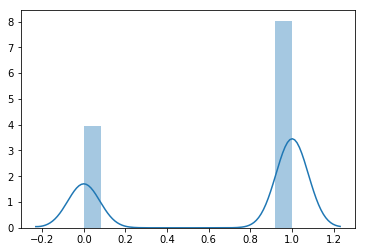

In [8]:
#see the distribution of open restaurants
#sns.distplot(a=list(az_res["is_open"]))

**I am not interested in the restaurants that was already closed when the data was collected.**

In [67]:
#Keep the restaurants that are open
#df = az_res[az_res["is_open"]==1]
#len(df)

7680

**Now I will derive the status using two different API key, since the daily limit for each key is 5000.**

In [10]:
#Since the request limiti of Yelp API is 5000 daily, I need to get the label with two calls
#df1 = df.iloc[:4000]
#df2 = df.iloc[4000:]

In [11]:
#Set up headers with my API key
#headers = {'Authorization': 'Bearer %s' % YelpApiKey.APIKey2['API Key']}

In [407]:
#Define a function that get a the new is_open column
def get_is_open(endpnt, business_id, headers):
    if business_id!="":
        req = requests.get(endpnt+business_id,headers=headers)
        json_data = json.loads(req.text)
        try:
            return (json_data["is_closed"])
        except:
            return("")
    else:
        return("")

In [13]:
#Define the API endpoint
#endpoint = "https://api.yelp.com/v3/businesses/"
#Derive is_closed label
#is_open_2 = [get_is_open(endpoint, i, headers) for i in df1.business_id]

In [17]:
#Set up headers with my API key
#headers = {'Authorization': 'Bearer %s' % YelpApiKey.APIKey1['API Key']}
#Derive is_closed label
#is_open_1 = [get_is_open(endpoint, i, headers) for i in df2.business_id]

In [375]:
#Merge two list
#is_closed = is_open_2 + is_open_1
#This column is the target label that indicates if a previous open restaurant becomes closed

#Add this column to the data frame
#is_closed = pd.Series(is_closed, index=df.index)
#df["is_closed"] = is_closed

#Check missing values
#df.is_closed.value_counts()

False    4492
         3023
True      165
Name: is_closed, dtype: int64

**We have a lot of missing values, and they are my target label. 
I think this is due to the unmatched business id, so I will use Yelp API to get the correct business id.**

In [377]:
#Get the index of the missing values
#missing_idx = [i for i in range(len(is_closed)) if is_closed.iloc[i]==""]

In [397]:
#Define a function to search the correct business id
def search_id(buss_detail, headers):
    '''Input: a pandas series that contain the business detials, including name, city, state
            headers = api token
        return: a valid business id or "" '''
    #Define the endpoint
    ep = "https://api.yelp.com/v3/businesses/matches"
    try: 
        #Define the parameters
        params = {'city':buss_detail["city"], \
                  'state':buss_detail["state"], \
                  "country":"US", \
                  "address1":buss_detail["address"], \
                  "name":buss_detail["name"]}
    except:
        return("")
    #Request data from Yelp API
    js = requests.get(ep, params=params, headers=headers)
    try:
        return(json.loads(js.text)["businesses"][0]["id"])
    except:
        return("")

In [403]:
#Set up headers with my API key
#headers = {'Authorization': 'Bearer %s' % YelpApiKey.APIKey1['API Key']}
#correct_id = [search_id(df.iloc[i],headers) for i in missing_idx]

In [406]:
#sum([1 for i in correct_id if i==""])

31

In [408]:
#Use another API token
#headers = {'Authorization': 'Bearer %s' % YelpApiKey.APIKey2['API Key']}
#Derive is_closed label again
#is_closed_3 = [get_is_open(endpoint, i, headers) for i in correct_id]

In [414]:
#for i in range(len(missing_idx)):
 #   is_closed.iat[missing_idx[i]] = is_closed_3[i]
#Updata the is_closed column in the dataframe
#df["is_closed"] = is_closed
#df.is_closed.value_counts()

False    7383
True      265
           32
Name: is_closed, dtype: int64

**There are still 32 missing values in the target is_closed label. I will output the labeled dataset the drive, and lebel these 32 restaurants manually by doing reserach on Yelp and Google.**

In [ ]:
#Drop the is_open column since we know they are all true
#df = df.drop("is_open",axis=1)

In [ ]:
#Output the processed dataset
#df.to_csv("Arizona_restaurants.csv",index=False)`

In [103]:
#Import the well labeled dataset for further analysis
df = pd.read_csv("Arizona_restaurants.csv",encoding='unicode_escape')

**For the target label, convert False to 0, True to be 1**

In [104]:
def label_to_int(label):
    '''Input: a stirng of label, "True","False","0",or "1"
        return: an integer, 0 or 1'''
    if label=="TRUE" or label=="1":
        return(1)
    else:
        return(0)

In [105]:
#Use the function defined to update the column
target_label = pd.Series([label_to_int(i) for i in df.is_closed], index=df.index)
df["is_closed"] = target_label

In [106]:
df.head()

,address,attributes,business_id,categories,city,hours,latitude,longitude,name,postal_code,review_count,stars,state,is_closed
0,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,Taco Bell,85016.0,18,3.0,AZ,0
1,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",33.613020,-111.977036,Nee House Chinese Restaurant,85032.0,269,3.5,AZ,0
2,1789 W Jefferson,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",ysfeDcLAYk_MVzfBmyiSTg,"Restaurants, Food, Cafes",Phoenix,0,33.446805,-112.097129,Vals Getaway DES Cafeteria,85007.0,14,3.0,AZ,0
3,550 N Hayden Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",nsNONDHbV7Vudqh21uicqw,"Seafood, Restaurants",Scottsdale,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",33.454286,-111.909405,Salt Cellar,85257.0,526,3.5,AZ,0
4,"3415 West Glendale Ave, Bldg 25A","{'RestaurantsGoodForGroups': 'True', 'Business...",Rs8Wi4OEjeOX7LVlzsXDOA,"Restaurants, Mexican, Sushi Bars",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",33.537164,-112.132926,Sushi Mocorito,85051.0,9,3.0,AZ,0


# EDA

In [107]:
#See the summary of the numeric variables
df.describe()

,latitude,longitude,postal_code,review_count,stars,is_closed
count,7680.000000,7680.000000,7670.000000,7680.000000,7680.000000,7680.000000
mean,33.487391,-112.008082,85188.018123,127.123958,3.442643,0.035156
std,0.121365,0.174119,127.530932,191.248634,0.849610,0.184187
min,33.210781,-112.540321,84295.000000,3.000000,1.000000,0.000000
25%,33.394779,-112.122154,85034.000000,19.000000,3.000000,0.000000
50%,33.479499,-111.984226,85226.000000,60.000000,3.500000,0.000000
75%,33.582508,-111.891783,85283.000000,157.000000,4.000000,0.000000
max,33.844608,-111.600936,85734.000000,2556.000000,5.000000,1.000000


In [108]:
#Look at missing values
df.count()

address         7577
attributes      7478
business_id     7680
categories      7680
city            7680
hours           7680
latitude        7680
longitude       7680
name            7680
postal_code     7670
review_count    7680
stars           7680
state           7680
is_closed       7680
dtype: int64

**There are missing values, but not a lot. I will deal with them further.**

## Distribution of review count

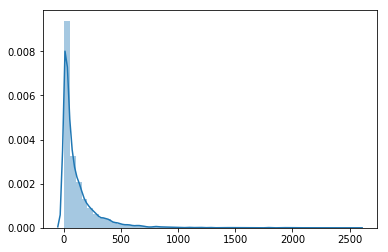

In [109]:
sns.distplot(a=list(df.review_count))

## Distribution of star

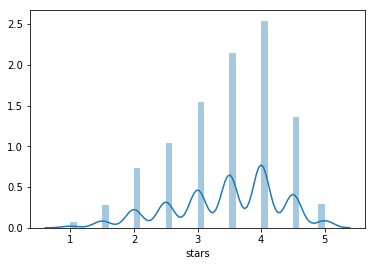

In [110]:
sns.distplot(a=df.stars)

## Distribution by location

In [111]:
len(df.city.unique())

52

In [112]:
df["city"].value_counts()

Phoenix                 2724
Scottsdale               931
Mesa                     826
Tempe                    649
Chandler                 546
Glendale                 499
Gilbert                  405
Peoria                   266
Surprise                 171
Goodyear                 145
Avondale                 139
Cave Creek                61
Fountain Hills            51
Sun City                  36
Litchfield Park           33
Tolleson                  28
Laveen                    28
El Mirage                 18
Paradise Valley           13
Buckeye                   12
Sun City West             12
Carefree                  12
Sun Lakes                  9
Queen Creek                9
Youngtown                  5
Anthem                     4
Guadalupe                  4
Fort McDowell              4
Ahwatukee                  4
Laveen Village             4
PHOENIX                    4
Higley                     4
Apache Junction            3
Fort Mcdowell              2
Waddell       

I can see that, for instance, Mesa is represented by "Mesa", "mesa", "Mesa AZ", and "MESA". So if I want to convert this column to dummies variables, I need to deal with this kind of duplicates to reduce the dimension. 

In [123]:
df.state.unique()

array(['AZ'], dtype=object)

## Distribution of the target variable is_closed

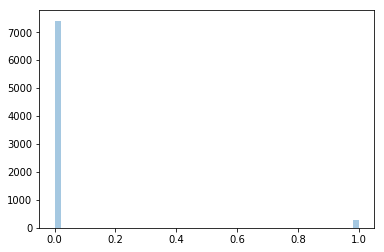

In [124]:
sns.distplot(a=list(df.is_closed),kde=False)

In [125]:
df["is_closed"].value_counts()

0    7410
1     270
Name: is_closed, dtype: int64

Class imbalance is several.

# Feature engineering 

### Create a new variable repersent the open hours each week

In [126]:
#Define a function that calculate the open hour for one day
def open_hours(time_range):
    '''Input: a string of time range
        return: number of open hours'''
    #Derive the open time and closed time
    open_closed = time_range.split("-")
    if open_closed[0]==open_closed[1]:
        return (0)
    else:
        open_time = [int(i) for i in open_closed[0].split(":")]
        open_time = open_time[0] + open_time[1]/60
        closed_time = [int(i) for i in open_closed[1].split(":")]
        if closed_time[0]==0:
            closed_time[0]=24
        closed_time = closed_time[0] + closed_time[1]/60
        return (closed_time-open_time)
            
        
#Define a fucntion that get the total open hours for a week
def hours_per_week(hours_dict):
    '''Input: a dictionary that contains open hours for each day
        return: total open hours for a week'''
    import yaml
    #Detect missing values
    if hours_dict=="0":
        return(0)
    daily_hour = list(yaml.load(hours_dict).values())
    total_hours = [open_hours(i) for i in daily_hour]
    return(sum(total_hours))
    

In [127]:
#Fill missing value with 0
df["hours"] = df["hours"].fillna("0")
#Apply the functions defined to get weekly hours
weekly_hours = [hours_per_week(i) for i in df.hours]
weekly_hours = pd.Series(weekly_hours, index=df.index)
#Add this new column to the data frame
df["weekly_hours"] = weekly_hours

### Create dummy variables with city column

In [118]:
#First lowercase the city name
city = df.city.str.lower()
len(city.unique())

44

In [119]:
city.unique()

array(['phoenix', 'scottsdale', 'chandler', 'mesa', 'glendale',
       'surprise', 'goodyear', 'gilbert', 'sun city', 'avondale',
       'cave creek', 'tempe', 'peoria', 'fountain hills', 'sun lakes',
       'fort mcdowell', 'laveen', 'paradise valley', 'tolleson',
       'somerton', 'carefree', 'litchfield park', 'queen creek',
       'el mirage', 'anthem', 'glendale az', 'apache junction', 'buckeye',
       'guadalupe', 'sun city west', 'youngtown', 'mesa az',
       'laveen village', 'higley', 'scottdale', 'waddell', 'ahwatukee',
       'phx', 'maricopa', 'central city', 'central city village',
       'rio verde', 'phoenix valley', 'central'], dtype=object)

In [120]:
#Deal with the rest of duplicates
city = [i if i!='mesa az' else "mesa" for i in city]
city = [i if i!='central' else "central city" for i in city]
city = [i if i!="phx" else "phoenix" for i in city]
city = [i if i!="scottdale" else "scottsdale" for i in city]
city = [i if i!="glendale az" else "glendale" for i in city]
city = pd.Series(city, index=df.index)
len(city.unique())

39

In [121]:
#Create dummies 
city = pd.get_dummies(city)
df = pd.concat([df,city],axis=1)

In [128]:
df.head()

,address,attributes,business_id,categories,city,hours,latitude,longitude,name,postal_code,...,scottsdale,somerton,sun city,sun city west,sun lakes,surprise,tempe,tolleson,waddell,youngtown
0,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,Taco Bell,85016.0,...,0,0,0,0,0,0,0,0,0,0
1,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",33.613020,-111.977036,Nee House Chinese Restaurant,85032.0,...,0,0,0,0,0,0,0,0,0,0
2,1789 W Jefferson,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",ysfeDcLAYk_MVzfBmyiSTg,"Restaurants, Food, Cafes",Phoenix,0,33.446805,-112.097129,Vals Getaway DES Cafeteria,85007.0,...,0,0,0,0,0,0,0,0,0,0
3,550 N Hayden Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",nsNONDHbV7Vudqh21uicqw,"Seafood, Restaurants",Scottsdale,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",33.454286,-111.909405,Salt Cellar,85257.0,...,1,0,0,0,0,0,0,0,0,0
4,"3415 West Glendale Ave, Bldg 25A","{'RestaurantsGoodForGroups': 'True', 'Business...",Rs8Wi4OEjeOX7LVlzsXDOA,"Restaurants, Mexican, Sushi Bars",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",33.537164,-112.132926,Sushi Mocorito,85051.0,...,0,0,0,0,0,0,0,0,0,0


### Create a new indicator column that indicates if a restaurant is one of the chain restaurant


In [129]:
#Create a dictonary where keys are restaurant names, values are occurance of the name in the data frame
chain_dict = df.name.value_counts().to_dict()
#Store the restaurant names
res_names = list(chain_dict.keys())
#Make a dictionary where keys are names, values are chain restaurant indicatior, 0 or 1
chain_dict = [1 if chain_dict[i]>1 else 0 for i in res_names]
chain_dict = pd.Series(chain_dict, index=res_names).to_dict()

In [130]:
#Based on the dictonary above, create an indicotr column
is_chain = [chain_dict[i] for i in df.name]
is_chain = pd.Series(is_chain, index=df.index)
df["is_chain"] = is_chain
df.head()

,address,attributes,business_id,categories,city,hours,latitude,longitude,name,postal_code,...,somerton,sun city,sun city west,sun lakes,surprise,tempe,tolleson,waddell,youngtown,is_chain
0,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,Taco Bell,85016.0,...,0,0,0,0,0,0,0,0,0,1
1,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",33.613020,-111.977036,Nee House Chinese Restaurant,85032.0,...,0,0,0,0,0,0,0,0,0,0
2,1789 W Jefferson,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",ysfeDcLAYk_MVzfBmyiSTg,"Restaurants, Food, Cafes",Phoenix,0,33.446805,-112.097129,Vals Getaway DES Cafeteria,85007.0,...,0,0,0,0,0,0,0,0,0,0
3,550 N Hayden Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",nsNONDHbV7Vudqh21uicqw,"Seafood, Restaurants",Scottsdale,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",33.454286,-111.909405,Salt Cellar,85257.0,...,0,0,0,0,0,0,0,0,0,0
4,"3415 West Glendale Ave, Bldg 25A","{'RestaurantsGoodForGroups': 'True', 'Business...",Rs8Wi4OEjeOX7LVlzsXDOA,"Restaurants, Mexican, Sushi Bars",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",33.537164,-112.132926,Sushi Mocorito,85051.0,...,0,0,0,0,0,0,0,0,0,1


# Drop observation of food trucks
There are some missing values in the address column. They are mostly due to the observation are food trucks, instead of restaurants. Since I want to focus on the restaurant, I drop the obs of food trucks.


In [131]:
df = df[~df["categories"].str.contains("Food Trucks",na=False)]
len(df)

7528

### Create a new column that contains the number of neighbor restaurant within 0.5 mile

In [312]:
#!pip install --user geopy
import geopy.distance

In [316]:
#Define a function that calculate the distance between two restaurants
def res_dis(coords_1,coords_2):
    '''Input: two list of coordinates of the two restaurant
        return: the distance between them'''
    return (geopy.distance.geodesic(coords_1, coords_2).miles)

In [322]:
#Define a tuple to store the distances between restaurants
dis_tup = []
for i in range(len(df)):
    coords_1 = [df.latitude.iloc[i], df.longitude.iloc[i]]
    dis = []
    for j in range(len(df)):
        coords_2 = [df.latitude.iloc[j], df.longitude.iloc[j]]
        dis.append(res_dis(coords_1,coords_2))
    dis_tup.append(dis)

In [417]:
#output the distance matrix as a csv file
#pd.DataFrame(dis_tup).to_csv("distance.csv")

In [344]:
#Now count how many restaurant within 1 mile
neighbors=[]
for i in range(len(dis_tup)):
    neighbor = sum([1 for j in dis_tup[i] if j < 0.5])
    neighbors.append(neighbor)
    
#Add the list as a new column to the data frame
neighbors = pd.Series(neighbors,index=df.index)
df["neighbors"] = neighbors
df.head()

,address,attributes,business_id,categories,city,hours,latitude,longitude,name,postal_code,review_count,stars,state,is_closed,weekly_hours,county,is_chain,neighbors
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,0,50.0,Maricopa County,1,16
78,"13843 N Tatum Blvd, Ste 15","{'Caters': 'True', 'GoodForKids': 'True', 'Noi...",44YFU284Z3KDEy25QyVoUw,"Chinese, Restaurants",Phoenix,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",33.613020,-111.977036,Nee House Chinese Restaurant,85032,269,3.5,AZ,0,71.5,Maricopa County,0,5
133,1789 W Jefferson,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",ysfeDcLAYk_MVzfBmyiSTg,"Restaurants, Food, Cafes",Phoenix,0,33.446806,-112.097129,Vals Getaway DES Cafeteria,85007,14,3.0,AZ,0,0.0,Maricopa County,0,9
162,550 N Hayden Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",nsNONDHbV7Vudqh21uicqw,"Seafood, Restaurants",Scottsdale,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",33.454286,-111.909405,Salt Cellar,85257,526,3.5,AZ,0,56.0,Maricopa County,0,5
181,"3415 West Glendale Ave, Bldg 25A","{'RestaurantsGoodForGroups': 'True', 'Business...",Rs8Wi4OEjeOX7LVlzsXDOA,"Restaurants, Mexican, Sushi Bars",Phoenix,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",33.537164,-112.132926,Sushi Mocorito,85051,9,3.0,AZ,0,79.0,Maricopa County,1,12


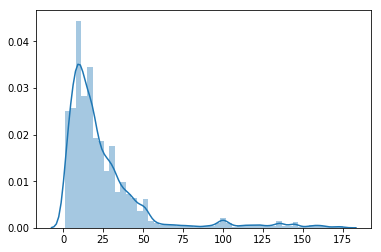

In [345]:
sns.distplot(a=list(df.neighbors))

### Create dummies variable with attributes

In [349]:
#Make categories column a tuple
attributes = [list(i.keys()) for i in df.attributes.fillna("") if i!=""]
#Make this tuple a flat list
attributes = [i for t in attributes for i in t]
#Find all unique attributes
unique_att = list(pd.Series(categories).unique())
len(unique_att)

39

In [353]:
#Define a data frame with dummy attribute
att_df = pd.DataFrame(np.zeros([len(df),len(unique_att)]),columns=unique_att)

In [355]:
for i in range(len(att_df)):
    attributes_col = df.attributes.fillna("")
    if attributes_col.iloc[i]!="":
        atts = attributes_col.iloc[i]
        for j in list(atts.keys()):
            if atts[j]=="True":
                att_df.at[i,j]=1
                

In [372]:
#Now merge the attribute dataframe to the original dataframe
att_df.index = df.index
df = pd.concat([df, att_df],sort=False,axis=1)

In [135]:
#Output the processed dataset
df.to_csv("processed_details.csv",index=False)